# Analysis: reliability analysis using RMS violated inequality constraints

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from infeas import analyse
import easyvvuq as uq

In [2]:
# Read in all campaigns to dict containing campaign object and samples for each
campaign_names = ["1p", "2p", "3p_only", "3p_bad", "3p_mc"]
# Beware campaign name bug: string pattern must match only one campaign
campaigns = {}
for campaign_name in campaign_names:
    campaigns[campaign_name] = {}
    # TODO Do we actually ever need samples? Can get back from campaign later anyway
    campaigns[campaign_name]["campaign"], campaigns[campaign_name]["samples"] = (
        analyse.get_campaign(campaign_name=campaign_name)
    )

Reading in campaign database.
Campaign read in. Number of samples = 5
Reading in campaign database.
Campaign read in. Number of samples = 25
Reading in campaign database.
Campaign read in. Number of samples = 125
Reading in campaign database.
Campaign read in. Number of samples = 125
Reading in campaign database.
Campaign read in. Number of samples = 625


## Analysis

### Distribution of violated constraint residuals

(0.0, 0.24240714428785018)

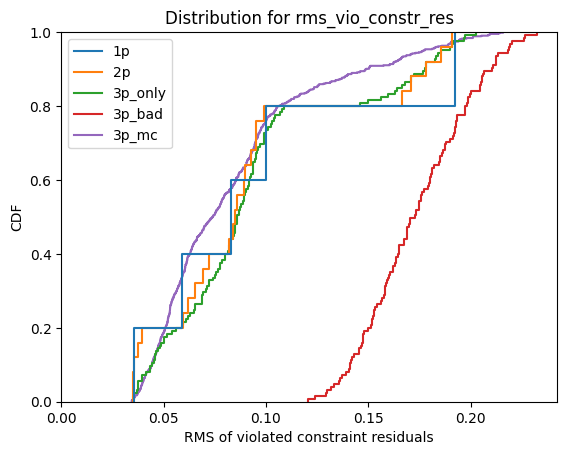

In [4]:
fig, ax = plt.subplots()
qoi_cols = ["rms_vio_constr_res"]
study_cdf_dfs = []

for campaign_name in campaigns:
    results = campaigns[campaign_name]["campaign"].analyse(qoi_cols=qoi_cols)

    # get_distribution() method not implemented for MCSampler in easyVVUQ
    # not implemented in AnalysisResults (base) or QMCAnalysisResults (returned in MC case)
    # Have to use seaborn instead to get dist for MC sampling
    # For non-MC sampling case:
    # if type(results) != uq.analysis.qmc_analysis.QMCAnalysisResults:
    #     dist = results.get_distribution(qoi="rms_vio_constr_res")
    #     # Locations for density function to be evaluated
    #     x = np.linspace(dist.lower[0], dist.upper[0], num=500)
    #     cdf = dist.cdf(x)
    #     sns.lineplot(x=x, y=cdf, markers=True, ax=ax, label=campaign_name)

    # Can use ecdfplot for all data, PCE or MC-obtained
    results.samples.columns = results.samples.columns.droplevel(1)
    samples = results.samples["rms_vio_constr_res"]
    samples = samples.rename(campaign_name)
    study_cdf_dfs.append(samples)

cdfs = pd.concat(study_cdf_dfs, axis=1)
sns.ecdfplot(data=cdfs, ax=ax)
ax.set_title("Distribution for rms_vio_constr_res")
ax.set_xlabel("RMS of violated constraint residuals")
ax.set_ylabel("CDF")
ax.set_xlim([0.0, None])

1, 2 and 3 uncertain parameters all very similar. In the "3p_bad" case, making fimp_14 uncertainty range well away from solution point (i.e. likely to cause large constraint violations) shifts the curve to the right. The Monte Carlo run (625 samples) broadly agrees with the PCE CDFs. 

Reliability $R = F_s(0 \mid \theta)= 0$, $P = 0$ of satisfying requirements. This indicates a problem with this solution point: it is never feasible under these uncertainties.